In [1]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [2]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df4 = pd.read_excel(data_path, sheet_name=1)


## Classification of Healthy plants vs Unhealthy plants

## SMOTE

In [3]:
# Make a new column 'Health_Status'
df = df4.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.078084,0.075299,0.077410,0.074002,0.070505,0.067700,0.062893,0.062420,...,0.036214,0.036081,0.035957,0.035807,0.035688,0.035551,0.035364,0.035257,0.035179,0.035142
1,Control,1,0.073550,0.067523,0.071681,0.067482,0.063859,0.062469,0.059024,0.057638,...,0.033057,0.032865,0.032683,0.032480,0.032208,0.032009,0.031834,0.031691,0.031569,0.031492
2,Control,1,0.078702,0.072332,0.076551,0.075096,0.069730,0.063826,0.060950,0.061619,...,0.032032,0.031893,0.031702,0.031533,0.031349,0.031142,0.030905,0.030750,0.030586,0.030511
3,Control,1,0.068565,0.067309,0.070531,0.066035,0.062364,0.060529,0.055741,0.052761,...,0.031268,0.031147,0.030997,0.030795,0.030522,0.030354,0.030158,0.030026,0.030024,0.029915
4,Control,1,0.070898,0.067701,0.075494,0.069948,0.063975,0.061855,0.060048,0.059379,...,0.029287,0.029146,0.029101,0.028976,0.028791,0.028641,0.028453,0.028389,0.028404,0.028371


In [4]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    209
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    209
0    209
Name: count, dtype: int64

Original shape: (239, 2151), Balanced shape: (418, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_15516\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.078084,0.075299,0.077410,0.074002,0.070505,0.067700,0.062893,0.062420,0.063808,...,0.036214,0.036081,0.035957,0.035807,0.035688,0.035551,0.035364,0.035257,0.035179,0.035142
1,1,0.073550,0.067523,0.071681,0.067482,0.063859,0.062469,0.059024,0.057638,0.058499,...,0.033057,0.032865,0.032683,0.032480,0.032208,0.032009,0.031834,0.031691,0.031569,0.031492
2,1,0.078702,0.072332,0.076551,0.075096,0.069730,0.063826,0.060950,0.061619,0.062749,...,0.032032,0.031893,0.031702,0.031533,0.031349,0.031142,0.030905,0.030750,0.030586,0.030511
3,1,0.068565,0.067309,0.070531,0.066035,0.062364,0.060529,0.055741,0.052761,0.053525,...,0.031268,0.031147,0.030997,0.030795,0.030522,0.030354,0.030158,0.030026,0.030024,0.029915
4,1,0.070898,0.067701,0.075494,0.069948,0.063975,0.061855,0.060048,0.059379,0.059372,...,0.029287,0.029146,0.029101,0.028976,0.028791,0.028641,0.028453,0.028389,0.028404,0.028371


In [5]:
# data treatment

# Data preparation for model production
df_X = df_balanced.drop(columns=['Sana'])

X = df_X.values  

y = df_balanced['Sana'].values

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Logistic Regression

In [6]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    },
    # L2 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'lbfgs'],
        'model__class_weight': [None, 'balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': [None, 'balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.9285714285714286
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.91      0.95      0.93        63

    accuracy                           0.93       126
   macro avg       0.93      0.93      0.93       126
weighted avg       0.93      0.93      0.93       126



In [7]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 10, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


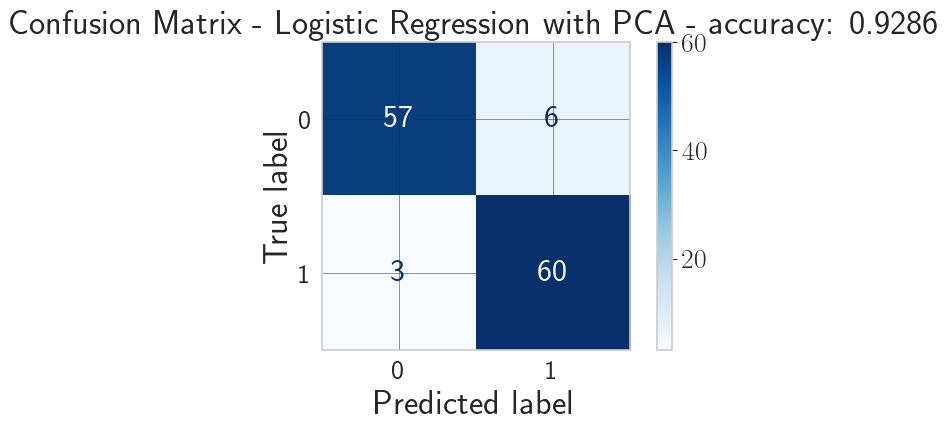

In [8]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()